# **Equipo 1**

Yocelin Juárez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


#Tener todo en un csv para trabajar desde aqui

In [46]:
 import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#Leer el df de un archivo
ruta_archivo =  folder_path + 'bases/df_unido_limpioLGD_avance2_version2_4NOV_507PM.csv'
df_unidoLDG = pd.read_csv(ruta_archivo)

In [48]:
# Ajustar la configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas del dataframe
display(df_unidoLDG.head())

,categoria_dominio_correo_Educativo,categoria_dominio_correo_Genérico,categoria_dominio_correo_Otros,base_SEXO_Femenino,base_SEXO_Masculino,base_Tipo Escuela_Arquitectura y Diseño,base_Tipo Escuela_Gobierno y Ciencias Sociales,base_Tipo Escuela_Humanidades y Educación,base_Tipo Escuela_Ingeniería y Ciencias,base_Tipo Escuela_Medicina y Ciencias de la salud,base_Tipo Escuela_Negocios,base_IDCAMPUS_,base_IDCAMPUS_1,base_IDCAMPUS_2,base_IDCAMPUS_8,base_IDCAMPUS_A,base_IDCAMPUS_A1,base_IDCAMPUS_AA,base_IDCAMPUS_C,base_IDCAMPUS_D,base_IDCAMPUS_E,base_IDCAMPUS_F,base_IDCAMPUS_G,base_IDCAMPUS_G1,base_IDCAMPUS_GA,base_IDCAMPUS_GQ,base_IDCAMPUS_GS,base_IDCAMPUS_H,base_IDCAMPUS_I,base_IDCAMPUS_J,base_IDCAMPUS_K,base_IDCAMPUS_L,base_IDCAMPUS_M,base_IDCAMPUS_N,base_IDCAMPUS_O,base_IDCAMPUS_P,base_IDCAMPUS_PUE,base_IDCAMPUS_Q,base_IDCAMPUS_R,base_IDCAMPUS_S,base_IDCAMPUS_T,base_IDCAMPUS_U,base_IDCAMPUS_W,base_IDCAMPUS_X,base_IDCAMPUS_Y,base_IDCAMPUS_Z,base_campusoperación_Aguascalientes,base_campusoperación_Chiapas,base_campusoperación_Chihuahua,base_campusoperación_Ciudad Juárez,base_campusoperación_Ciudad Obregón,base_campusoperación_Ciudad de México,base_campusoperación_Cuernavaca,base_campusoperación_EGADE,base_campusoperación_Escuela de Gobierno y Transformación Pública,base_campusoperación_Estado de México,base_campusoperación_Guadalajara,base_campusoperación_Guaymas,base_campusoperación_Hidalgo,base_campusoperación_Irapuato,base_campusoperación_Laguna,base_campusoperación_León,base_campusoperación_Mazatlán,base_campusoperación_Monterrey,base_campusoperación_Morelia,base_campusoperación_Programas en Línea,base_campusoperación_Puebla,base_campusoperación_Querétaro,base_campusoperación_Saltillo,base_campusoperación_San Luis Potosí,base_campusoperación_Santa Fe,base_campusoperación_Sede EGADE Monterrey,base_campusoperación_Sinaloa,base_campusoperación_Sonora Norte,base_campusoperación_Tampico,base_campusoperación_Toluca,base_campusoperación_Veracruz,base_campusoperación_Zacatecas,base_GIROEMPRESA_,base_GIROEMPRESA_Administración,base_GIROEMPRESA_Administración de Proyectos,base_GIROEMPRESA_Agrícola,base_GIROEMPRESA_Alimentos (Comercializador),base_GIROEMPRESA_Alimentos (Productos/Procesamiento),base_GIROEMPRESA_Artesanal,base_GIROEMPRESA_Aseguradora,base_GIROEMPRESA_Automotriz,base_GIROEMPRESA_Bienes Raíces,base_GIROEMPRESA_Boutiques,base_GIROEMPRESA_Comercializadora,base_GIROEMPRESA_Comunicación,base_GIROEMPRESA_Construcción,base_GIROEMPRESA_Consultoría,base_GIROEMPRESA_Contabilidad,base_GIROEMPRESA_Cómputo (Consultoría / Capacitación),base_GIROEMPRESA_Cómputo (Desarrollo de software),"base_GIROEMPRESA_Cómputo (Manufactura, Hardware)",base_GIROEMPRESA_De Servicios,base_GIROEMPRESA_Decoración,base_GIROEMPRESA_Dirección,base_GIROEMPRESA_Diseño Grafico,base_GIROEMPRESA_Editoriales,base_GIROEMPRESA_Educación,base_GIROEMPRESA_Entretenimiento,base_GIROEMPRESA_Estética / Productos de Belleza / Perfumería,base_GIROEMPRESA_Explotación de Recursos Naturales,base_GIROEMPRESA_Farmacéutica,base_GIROEMPRESA_Financiera,base_GIROEMPRESA_Finanzas,base_GIROEMPRESA_Ganadería / Caza,"base_GIROEMPRESA_Gobierno (Federal, Estatal y Municipal)",base_GIROEMPRESA_Hoteleria y turismo,base_GIROEMPRESA_Imprenta,base_GIROEMPRESA_Industrias Diversas,base_GIROEMPRESA_Información,base_GIROEMPRESA_Innovación,base_GIROEMPRESA_Investigación,base_GIROEMPRESA_Logística,base_GIROEMPRESA_Manufacturera/ Maquiladora,base_GIROEMPRESA_Medicina / Salud,base_GIROEMPRESA_Medios de Comunicación,base_GIROEMPRESA_Mercadotecnia,base_GIROEMPRESA_Metal Mecánico,base_GIROEMPRESA_Minería / Extracción,base_GIROEMPRESA_Mueblero,base_GIROEMPRESA_No aplica,base_GIROEMPRESA_Otro,base_GIROEMPRESA_Plástico / Hule,base_GIROEMPRESA_Producción y operaciones,base_GIROEMPRESA_Publicidad,base_GIROEMPRESA_Químico,base_GIROEMPRESA_Recursos humanos,base_GIROEMPRESA_Relaciones Públicas,base_GIROEMPRESA_Responsabilidad Social,base_GIROEMPRESA_Restaurante / Bar,base_GIROEMPRESA_Seguros,base_GIROEMPRESA_Servi

Los histogramas de todas las columnas numéricas son fundamentales para entender la distribución de cada variable antes de avanzar con el análisis. Estos histogramas nos permitirán identificar patrones, valores atípicos y posibles sesgos en los datos, los cuales podrían influir en el rendimiento de los modelos de aprendizaje automático.

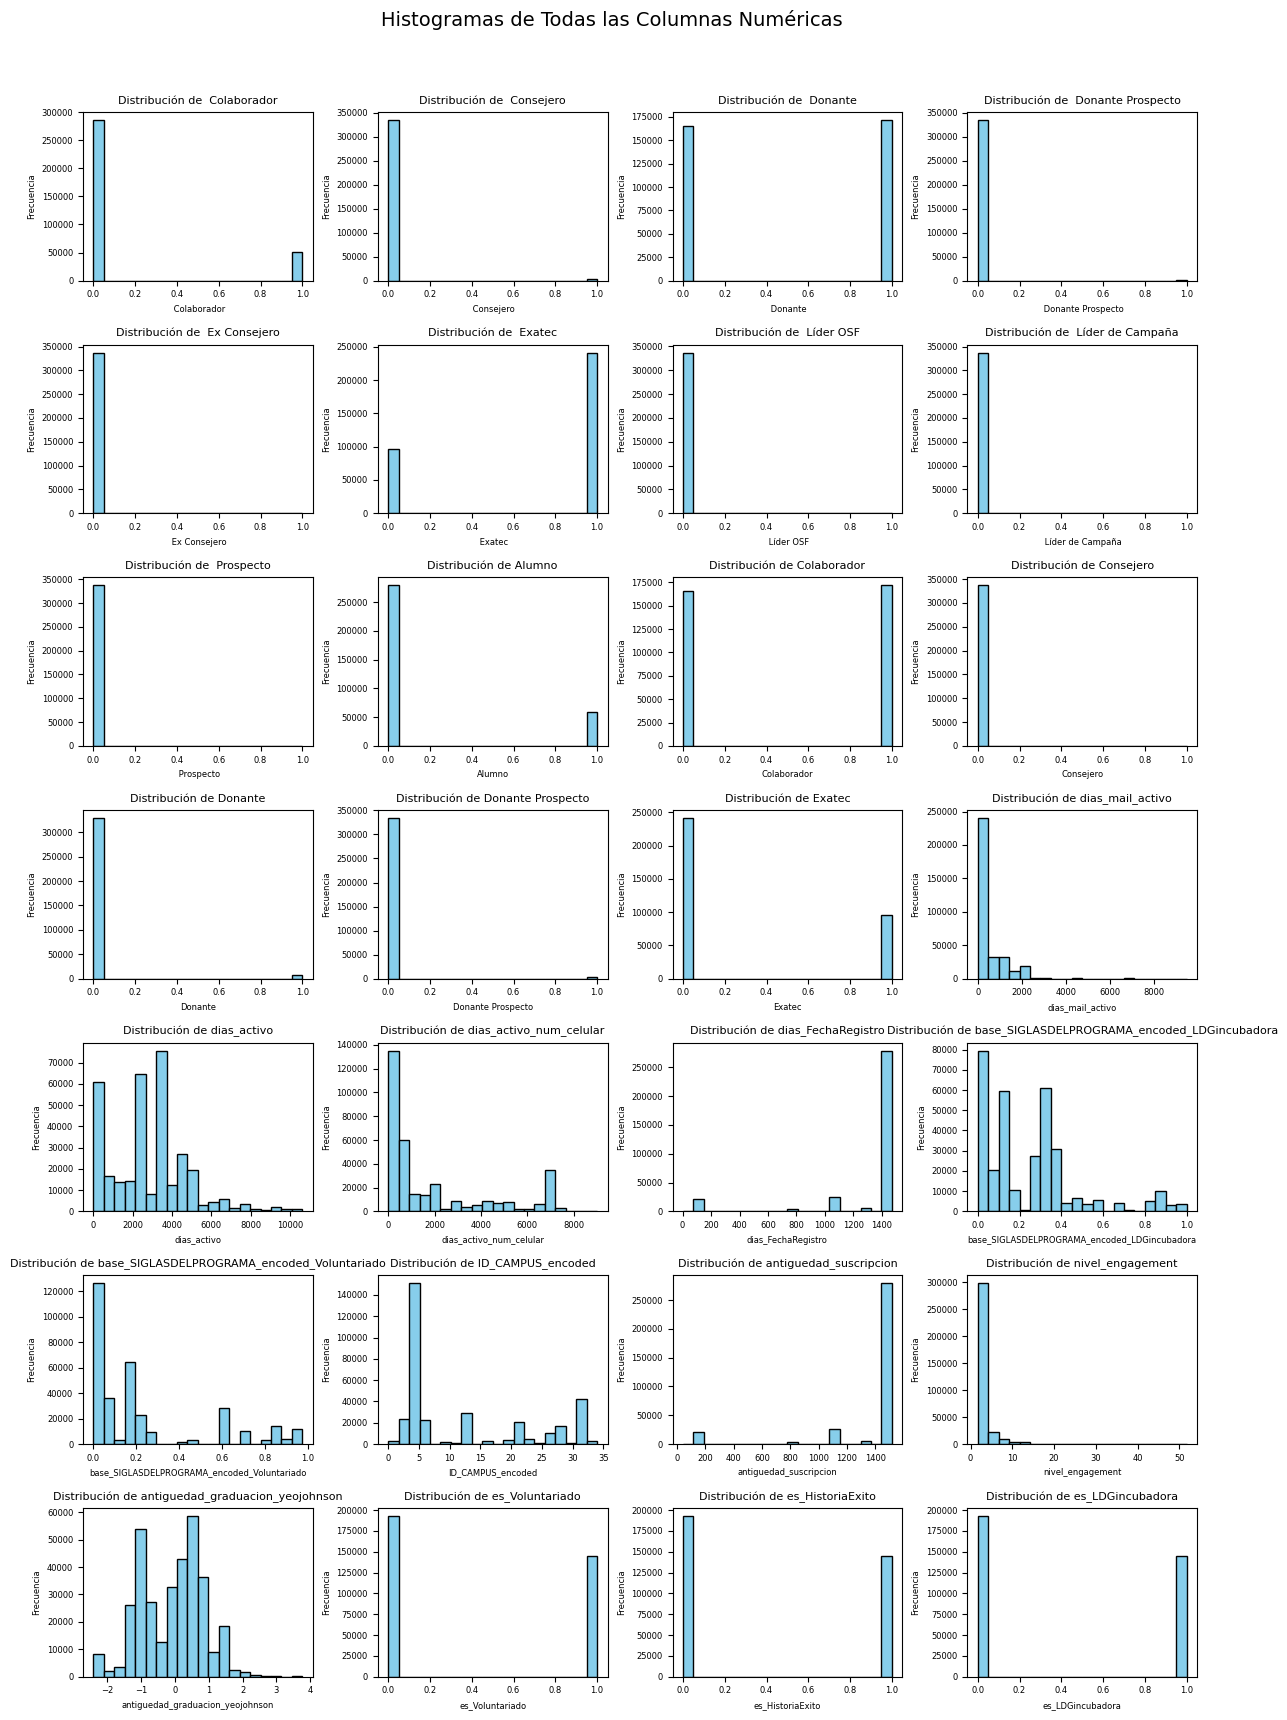

In [49]:
import matplotlib.pyplot as plt
import math

# Filtrar solo las columnas numéricas
df_numerico = df_unidoLDG.select_dtypes(include=['number'])
columnas_numericas = df_numerico.columns

# Configurar el número de filas y columnas en la cuadrícula de subplots
n_columnas = len(columnas_numericas)
n_filas = math.ceil(n_columnas / 4)  # 4 gráficos por fila

# Configurar el tamaño de la figura (más reducido)
fig, axes = plt.subplots(nrows=n_filas, ncols=4, figsize=(12, n_filas * 2.5))  # Ajustamos el figsize

fig.suptitle('Histogramas de Todas las Columnas Numéricas', fontsize=14)  # Reducir la fuente del título principal

# Crear un histograma para cada columna numérica
for ax, col in zip(axes.flatten(), columnas_numericas):
    ax.hist(df_numerico[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribución de {col}', fontsize=8)  # Reduce aún más el tamaño de la fuente del título
    ax.set_xlabel(col, fontsize=6)  # Reduce aún más el tamaño de la fuente del eje x
    ax.set_ylabel('Frecuencia', fontsize=6)  # Reduce aún más el tamaño de la fuente del eje y
    ax.tick_params(axis='both', which='major', labelsize=6)  # Reduce aún más el tamaño de la fuente de las etiquetas de los ejes

# Eliminar subplots vacíos si el número de columnas no es múltiplo de 4
for ax in axes.flatten()[n_columnas:]:
    ax.remove()

# Ajustar el layout (más espacio entre subplots)
plt.tight_layout(rect=[0, 0, 1, 0.96], w_pad=0.5, h_pad=1.0)  # Ajusta w_pad y h_pad para controlar el espacio entre subplots
plt.show()

En los histogramas de las columnas numéricas, podemos observar que varias variables presentan distribuciones altamente sesgadas hacia valores específicos, como las variables binarias (0 y 1), que indican la presencia o ausencia de ciertas características en los registros. Esto sugiere que en la mayoría de los casos, los valores predominantes son cero, reflejando que muchas de estas características son poco frecuentes en los datos. Por otro lado, algunas variables, como "días_activo" y "antigüedad_suscripción," tienen distribuciones sesgadas hacia valores bajos, lo cual es común en variables temporales. Estas observaciones nos ayudarán a tomar decisiones sobre la necesidad de transformaciones, normalización y selección de características relevantes para mejorar el desempeño del modelo.

#**Avance 3. Baseline**

##¿Qué algoritmo (individual, NO ensambles) se puede utilizar como baseline para predecir las variables objetivo?


Para problemas de clasificación como el nuestro, algunos algoritmos comunes y efectivos que analizamos son

**Regresión logística:** Sencillo y fácil de interpretar,  buena opción cuando las relaciones entre las variables son lineales.

**Árboles de decisión:** Capaces de manejar interacciones complejas entre características, pero susceptibles a sobreajuste si no se podan adecuadamente.

**k-Nearest Neighbors (k-NN):** Un algoritmo no paramétrico que puede ser una buena opción cuando no se tiene una suposición clara sobre la forma de los datos.


Hemos elegido **Regresión Logística** como el modelo baseline debido a varias razones. En primer lugar, el problema que estamos abordando es de clasificación binaria (Si/no pertenecen a una iniciativa), lo que hace que la regresión logística sea una opción natural. Además, este algoritmo es interpretable, lo que es importante para poder comunicar los resultados a los stakeholders y entender cómo cada característica influye en la predicción. A pesar de ser un modelo lineal, es adecuado para manejar datos estructurados como los que tenemos en este proyecto, que incluyen tanto variables categóricas como numéricas.

La simplicidad de la regresión logística permite tener una solución rápida y eficiente sin requerir una gran cantidad de recursos de cómputo, lo que es útil en las primeras fases de análisis. Aunque otros algoritmos más complejos (como árboles de decisión o redes neuronales) podrían mejorar el rendimiento, la regresión logística proporciona una línea base sólida con bajo riesgo de sobreajuste. Además, facilita la gestión de expectativas en cuanto al desempeño inicial de los modelos.

###Creción de modelo

In [50]:
df_unidoLDG_encoded = df_unidoLDG.copy()

##Algoritmo: Regresión Logística

A continuación, implementaremos un modelo de **Regresión Logística** como punto de partida o baseline para predecir cada una de las variables objetivo en nuestro dataset: es_LDGincubadora, es_Voluntariado y es_HistoriaExito. El propósito de este modelo baseline es evaluar si existe una relación significativa entre las características del dataset y las variables objetivo, utilizando un modelo sencillo y de fácil interpretación.



In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir las variables objetivo
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']

# Iterar sobre cada variable objetivo
for objective_var in objective_variables:
    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=[objective_var])  # la columna objetivo
    y = df_unidoLDG_encoded[objective_var]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Logística
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    # Predicciones y evaluación
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    display(f"Resultados para la variable objetivo: {objective_var}")
    display(f"Accuracy del modelo ajustado: {accuracy}")
    display(classification_report(y_test, y_pred))
    display("-" * 50)

'Resultados para la variable objetivo: es_LDGincubadora'

'Accuracy del modelo ajustado: 0.884609114486847'

'              precision    recall  f1-score   support\n\n           0       0.91      0.88      0.90     38723\n           1       0.85      0.89      0.87     28752\n\n    accuracy                           0.88     67475\n   macro avg       0.88      0.88      0.88     67475\nweighted avg       0.89      0.88      0.88     67475\n'

'--------------------------------------------------'

'Resultados para la variable objetivo: es_Voluntariado'

'Accuracy del modelo ajustado: 0.8435272323082623'

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86     38609\n           1       0.81      0.83      0.82     28866\n\n    accuracy                           0.84     67475\n   macro avg       0.84      0.84      0.84     67475\nweighted avg       0.84      0.84      0.84     67475\n'

'--------------------------------------------------'

'Resultados para la variable objetivo: es_HistoriaExito'

'Accuracy del modelo ajustado: 0.9179992589848092'

'              precision    recall  f1-score   support\n\n           0       0.95      0.90      0.93     38381\n           1       0.88      0.94      0.91     29094\n\n    accuracy                           0.92     67475\n   macro avg       0.92      0.92      0.92     67475\nweighted avg       0.92      0.92      0.92     67475\n'

'--------------------------------------------------'

##Análisis de Importancia de Características

In [52]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

###Filter: Selección de Características Usando Chi-Cuadrado




Este análisis es adecuado para variables categóricas ya que selecciona las 10 características más relevantes (k=10) y se muestra el nombre de cada característica seleccionada para identificar las variables que tienen mayor impacto estadístico en cada variable objetivo.

In [53]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

selected_features = {}
for objective_var in objective_variables:
    # Definir variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=[objective_var])
    y = df_unidoLDG_encoded[objective_var]

    # Escalar X al rango [0, 1]
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Selección de características usando chi-cuadrado
    chi2_selector = SelectKBest(chi2, k=10)
    X_selected = chi2_selector.fit_transform(X_scaled, y)

    # Obtener nombres de las características seleccionadas
    feature_mask = chi2_selector.get_support()
    selected_features[objective_var] = X.columns[feature_mask]

    display(f"Características seleccionadas para {objective_var} usando chi-cuadrado:")
    display(selected_features[objective_var], "\n")


'Características seleccionadas para es_LDGincubadora usando chi-cuadrado:'

Index(['base_IDCAMPUS_A', 'base_campusoperación_Monterrey',
       'base_GIROEMPRESA_Construcción',
       'base_AREAORGANIZACIONAL_Administración de Proyectos',
       'base_ESTADO_RESIDENCIA_agrupado_coahuila',
       'base_ESTADONACIMIENTO_agrupado_jalisco',
       'participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG_True',
       'participacion_categoria_Egresados - iniciativa de Participación_ eventos Mentores_True',
       ' Donante', 'Exatec'],
      dtype='object')

'\n'

'Características seleccionadas para es_Voluntariado usando chi-cuadrado:'

Index(['base_GIROEMPRESA_Construcción', 'base_GIROEMPRESA_Finanzas ',
       'base_AREAORGANIZACIONAL_Administración de Proyectos',
       'base_AREAORGANIZACIONAL_Recursos humanos',
       'base_ESTADO_RESIDENCIA_agrupado_Nuevo León',
       'base_ESTADO_RESIDENCIA_agrupado_coahuila',
       'base_ESTADONACIMIENTO_agrupado_coahuila de zaragoza', ' Colaborador',
       ' Donante', 'Alumno'],
      dtype='object')

'\n'

'Características seleccionadas para es_HistoriaExito usando chi-cuadrado:'

Index(['base_Tipo Escuela_Negocios', 'base_GIROEMPRESA_Construcción',
       'base_GIROEMPRESA_Educación', 'base_GIROEMPRESA_Finanzas ',
       'base_AREAORGANIZACIONAL_Administración de Proyectos',
       'base_AREAORGANIZACIONAL_Recursos humanos',
       'base_ESTADO_RESIDENCIA_agrupado_coahuila',
       'base_ESTADONACIMIENTO_agrupado_coahuila de zaragoza',
       'participacion_categoria_Egresados - iniciativa de Participación_ eventos Mentores_True',
       ' Colaborador'],
      dtype='object')

'\n'

###Interpretación de Resultados para Cada Variable Objetivo

**Para es_LDGincubadora:**
Las características seleccionadas están relacionadas con el campus de operación, la industria de construcción y el área organizacional de administración de proyectos. Esto sugiere que ciertos sectores y ubicaciones tienen una influencia significativa en la probabilidad de pertenencia a LDG Incubadora.

Variables de residencia y lugar de nacimiento (como coahuila y jalisco) son también relevantes, lo cual podría indicar patrones geográficos que influyen en la probabilidad de pertenencia.

La participación en eventos de Mentores también es una característica importante, lo que puede reflejar la participación activa en iniciativas de la incubadora.

**Para es_Voluntariado:**
La industria de construcción y finanzas y las áreas organizacionales como administración de proyectos y recursos humanos aparecen como variables significativas, lo cual podría reflejar que personas de ciertos sectores tienen una mayor predisposición a participar en actividades de voluntariado.

Las características de ubicación geográfica (como Nuevo León y Coahuila) también son relevantes, sugiriendo una concentración de voluntarios en estas áreas.

**Para es_HistoriaExito:**
La presencia de base_Tipo Escuela_Negocios y las industrias de construcción, educación y finanzas resalta la relevancia de ciertos sectores y formaciones académicas para los perfiles de éxito.

Áreas organizacionales como administración de proyectos y recursos humanos sugieren que estas especialidades están asociadas con historias de éxito.

La ubicación en Coahuila (tanto en residencia como nacimiento) y el rol de Colaborador también destacan, posiblemente porque estas características representan una relación más fuerte con la institución y su misión.

####Visualización de Correlación
Después del análisis de chi-cuadrado, generamos un heatmap de correlación para visualizar la relación entre todas las características numéricas. Esto nos permitirá ver si existe colinealidad entre variables.

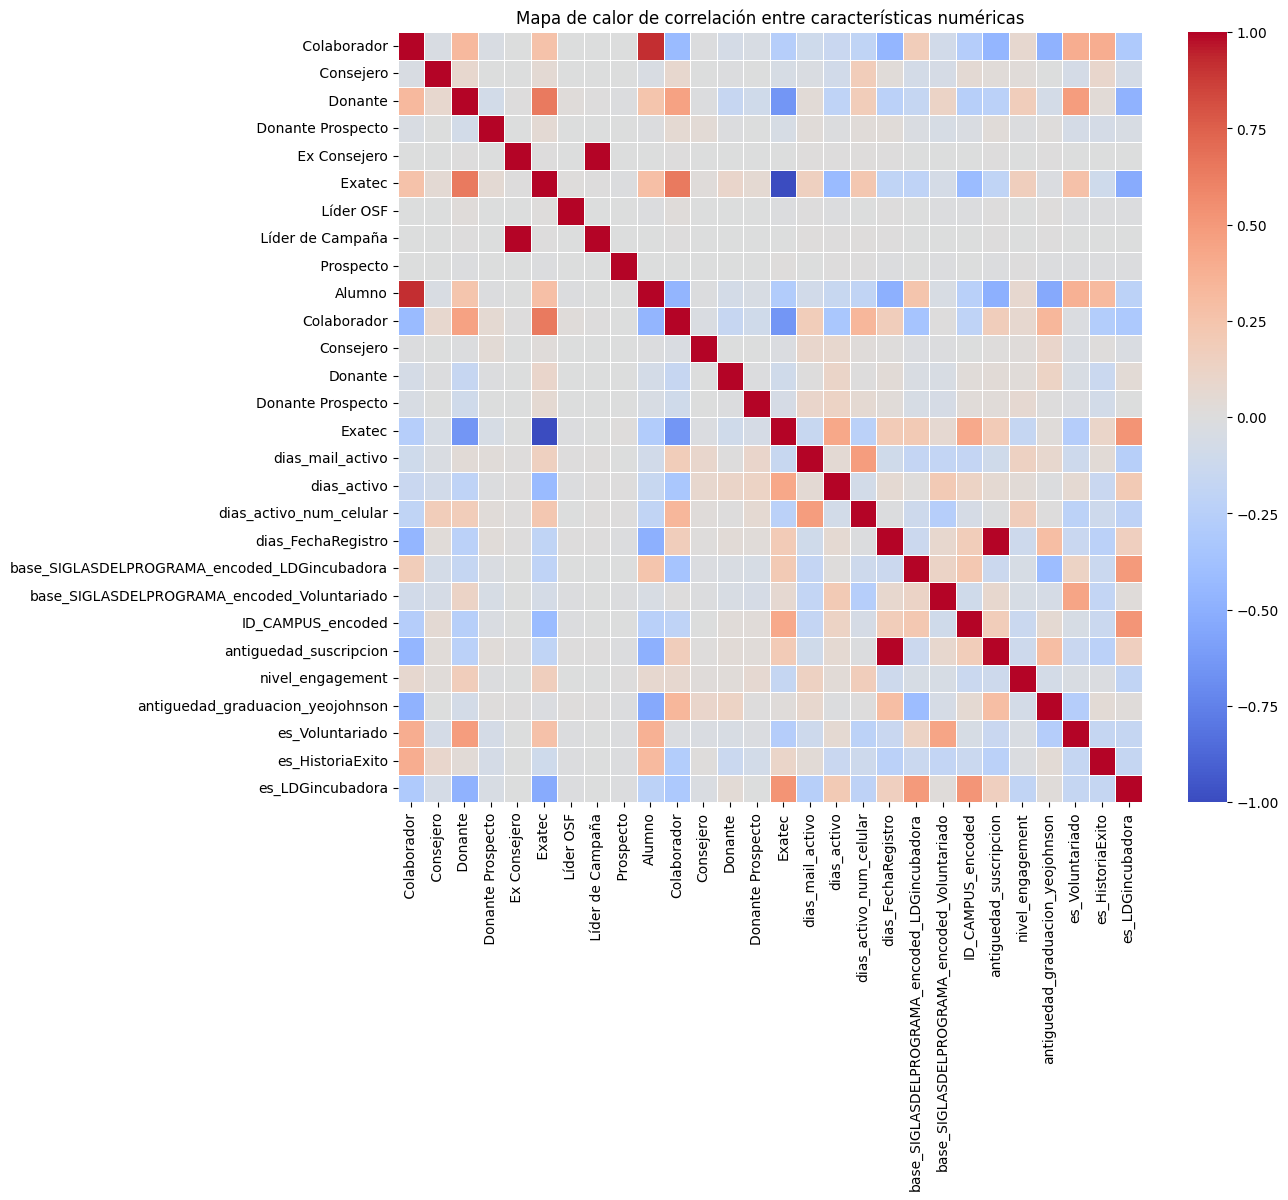

In [54]:
# Heatmap de correlación entre características numéricas
plt.figure(figsize=(12, 10))
correlation_matrix = df_unidoLDG_encoded.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de correlación entre características numéricas")
plt.show()

###Análisis de Colinealidad

**Variables Fuertemente Correlacionadas:**

Colaborador y Donante muestran una correlación significativa (cercana a 1). Esto indica que es común que aquellos marcados como "Colaborador" también sean clasificados como "Donante", lo cual es una relación lógica ya que la institución suele tener donantes entre sus colaboradores.

Prospecto y Alumno también tienen una correlación alta, lo cual sugiere que estos dos grupos podrían compartir características similares en cuanto a su relación con la institución.

**Variables con Correlación Moderada:**

Exatec y Donante tienen una correlación positiva moderada, lo cual podría reflejar que los ex-alumnos (Exatec) son más propensos a hacer donaciones. Esta información puede ser útil para predecir comportamientos relacionados con la donación y optimizar las campañas dirigidas a ex-alumnos.

Días activo y Días activo num celular muestran una correlación significativa, lo cual es lógico si estas variables están relacionadas con la actividad en distintos canales (correo y celular). Podrían ser redundantes para el modelo si ambas miden un comportamiento similar.

**Variables con Baja Correlación:**

Algunas variables, como nivel_engagement y antigüedad_suscripción, muestran bajas correlaciones con la mayoría de las otras variables. Esto indica que aportan información única al modelo y probablemente no tengan problemas de redundancia.

**es_LDGincubadora, es_Voluntariado, y es_HistoriaExito** (las variables objetivo) tienen correlaciones bajas o moderadas con las demás variables predictoras. Esto es positivo, ya que significa que estas variables objetivo no dependen completamente de ninguna otra variable única, sugiriendo que el modelo puede beneficiarse de una combinación de variables para predecir estas categorías.

###Coeficientes de la Regresión Logística

Para entender la relevancia de cada característica en el modelo, decidimos extraer los coeficientes de la Regresión Logística. Al analizar el valor absoluto de estos coeficientes, podemos identificar qué variables tienen un mayor impacto en la predicción de la variable objetivo.  Mientras que el chi-cuadrado nos dio una evaluación estadística de las relaciones entre las características y la variable objetivo, los coeficientes de la Regresión Logística reflejan la importancia predictiva en el modelo en sí. La combinación de ambos métodos nos permite una evaluación más robusta, fundamental para optimizar el modelo y mejorar su interpretabilidad.

In [55]:
# Extraer los coeficientes del modelo
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Nombres de las características
    'Importance': np.abs(model.coef_[0])  # Tomar el valor absoluto de los coeficientes
}).sort_values(by='Importance', ascending=False)  # Ordenar de mayor a menor importancia

# Mostrar las características más importantes
display("Importancia de las características en el modelo de Regresión Logística:")
display(feature_importance)


'Importancia de las características en el modelo de Regresión Logística:'

,Feature,Importance
200,evento_Campus_TEC Campus Monterrey,0.829634
102,base_GIROEMPRESA_Educación,0.787405
10,base_Tipo Escuela_Negocios,0.739381
150,base_AREAORGANIZACIONAL_Administración de Proy...,0.706364
236,base_ESTADONACIMIENTO_agrupado_jalisco,0.703853
...,...,...
109,base_GIROEMPRESA_Ganadería / Caza,0.000051
216,evento_Campus_TEC Sede EGADE Santa Fe,0.000046
124,base_GIROEMPRESA_Mueblero,0.000045
112,base_GIROEMPRESA_Imprenta,0.000039


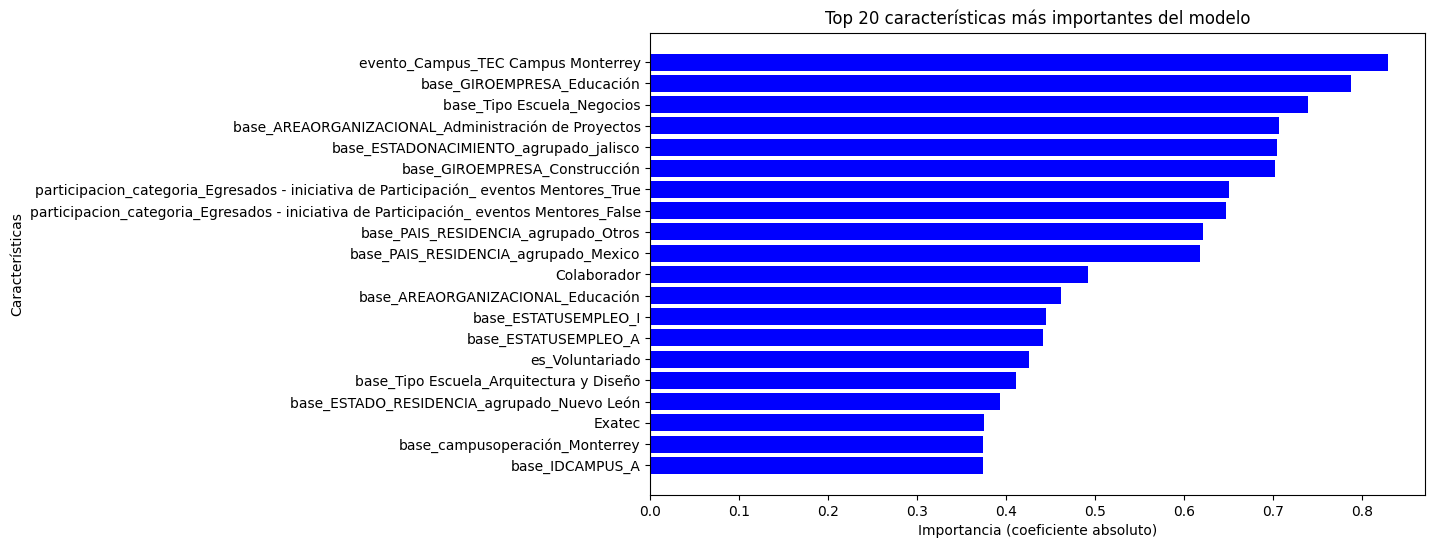

In [56]:
import matplotlib.pyplot as plt

# Seleccionar las 20 características más importantes
top_n = 20
top_features = feature_importance.head(top_n)

# Crear un gráfico de barras para visualizar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='b')
plt.xlabel('Importancia (coeficiente absoluto)')
plt.ylabel('Características')
plt.title(f'Top {top_n} características más importantes del modelo')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante aparezca arriba
plt.show()


Los resultados muestran que las características más importantes en el modelo incluyen variables relacionadas con el campus y el área de trabajo, como evento_Campus_TEC Campus Monterrey, base_GIROEMPRESA_Educación, y base_Tipo Escuela_Negocios. Estas variables parecen tener una influencia significativa en la predicción de la variable objetivo. Observamos que algunas características, como base_GIROEMPRESA_Boutiques y evento_Campus_TEC Sede EGADE Santa Fe, tienen un coeficiente muy bajo, lo que indica que su influencia es mínima. Estos hallazgos nos permiten enfocar futuros ajustes del modelo en las características más relevantes, y potencialmente simplificar el modelo al eliminar las variables de menor importancia.

##Sub / sobreajuste

Para evaluar el rendimiento de nuestro modelo de Regresión Logística en cada una de las variables objetivo, implementamos un ciclo for que itera sobre cada una de ellas (es_LDGincubadora, es_Voluntariado, es_HistoriaExito). En cada iteración, separamos las variables predictoras (X) de la variable objetivo (y) correspondiente y dividimos los datos en conjuntos de entrenamiento y prueba. Entrenamos el modelo en el conjunto de entrenamiento y evaluamos su rendimiento tanto en entrenamiento como en prueba Esto nos permite medir la capacidad del modelo para generalizar y verificar si estamos logrando buenos resultados de predicción en cada variable objetivo.

In [57]:
# Iterar sobre cada variable objetivo
for objective_var in objective_variables:
    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=[objective_var])  # la columna objetivo
    y = df_unidoLDG_encoded[objective_var]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Logística
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    # Predicciones en el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)

    # Calcular accuracy en el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)


    # Predicciones y evaluación en el conjunto de prueba
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    display(f"Resultados para la variable objetivo: {objective_var}")
    display(f"Accuracy en el conjunto de entrenamiento: {train_accuracy}")


'Resultados para la variable objetivo: es_LDGincubadora'

'Accuracy en el conjunto de entrenamiento: 0.8834407199783622'

'Resultados para la variable objetivo: es_Voluntariado'

'Accuracy en el conjunto de entrenamiento: 0.8444184262885471'

'Resultados para la variable objetivo: es_HistoriaExito'

'Accuracy en el conjunto de entrenamiento: 0.9178649633008148'

 **Descripción de los Resultados**

Los resultados muestran una buena consistencia entre los conjuntos, lo cual sugiere que el modelo está generalizando bien y no presenta un sobreajuste significativo.

Ahora calculamos el accuracy, precision, recall y F1-score en los conjuntos de entrenamiento y prueba, ya que estas métricas nos proporcionan una visión integral de la capacidad de generalización del modelo.
Esta evaluación nos permitirá verificar si el modelo está subajustando o sobreajustando.

In [58]:
# Definir las variables objetivo
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']

# Iterar sobre cada variable objetivo
for objective_var in objective_variables:
    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=[objective_var])  # la columna objetivo
    y = df_unidoLDG_encoded[objective_var]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Logística
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    # Predicciones en el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)

    # Calcular métricas en el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    display(f"Resultados para la variable objetivo: {objective_var}")  # Imprimir el nombre de la variable objetivo
    display(f"Accuracy en el conjunto de entrenamiento: {train_accuracy}")
    display("Reporte de clasificación en el conjunto de entrenamiento:")
    display(classification_report(y_train, y_train_pred))

    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas en el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred)
    display(f"Accuracy en el conjunto de prueba: {test_accuracy}")
    display("Reporte de clasificación en el conjunto de prueba:")
    display(classification_report(y_test, y_pred))
    display("-" * 50)


'Resultados para la variable objetivo: es_LDGincubadora'

'Accuracy en el conjunto de entrenamiento: 0.8834407199783622'

'Reporte de clasificación en el conjunto de entrenamiento:'

'              precision    recall  f1-score   support\n\n           0       0.91      0.88      0.90    154061\n           1       0.85      0.88      0.87    115836\n\n    accuracy                           0.88    269897\n   macro avg       0.88      0.88      0.88    269897\nweighted avg       0.88      0.88      0.88    269897\n'

'Accuracy en el conjunto de prueba: 0.884609114486847'

'Reporte de clasificación en el conjunto de prueba:'

'              precision    recall  f1-score   support\n\n           0       0.91      0.88      0.90     38723\n           1       0.85      0.89      0.87     28752\n\n    accuracy                           0.88     67475\n   macro avg       0.88      0.88      0.88     67475\nweighted avg       0.89      0.88      0.88     67475\n'

'--------------------------------------------------'

'Resultados para la variable objetivo: es_Voluntariado'

'Accuracy en el conjunto de entrenamiento: 0.8444184262885471'

'Reporte de clasificación en el conjunto de entrenamiento:'

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86    154175\n           1       0.81      0.84      0.82    115722\n\n    accuracy                           0.84    269897\n   macro avg       0.84      0.84      0.84    269897\nweighted avg       0.85      0.84      0.84    269897\n'

'Accuracy en el conjunto de prueba: 0.8435272323082623'

'Reporte de clasificación en el conjunto de prueba:'

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86     38609\n           1       0.81      0.83      0.82     28866\n\n    accuracy                           0.84     67475\n   macro avg       0.84      0.84      0.84     67475\nweighted avg       0.84      0.84      0.84     67475\n'

'--------------------------------------------------'

'Resultados para la variable objetivo: es_HistoriaExito'

'Accuracy en el conjunto de entrenamiento: 0.9178649633008148'

'Reporte de clasificación en el conjunto de entrenamiento:'

'              precision    recall  f1-score   support\n\n           0       0.96      0.90      0.93    154403\n           1       0.87      0.94      0.91    115494\n\n    accuracy                           0.92    269897\n   macro avg       0.91      0.92      0.92    269897\nweighted avg       0.92      0.92      0.92    269897\n'

'Accuracy en el conjunto de prueba: 0.9179992589848092'

'Reporte de clasificación en el conjunto de prueba:'

'              precision    recall  f1-score   support\n\n           0       0.95      0.90      0.93     38381\n           1       0.88      0.94      0.91     29094\n\n    accuracy                           0.92     67475\n   macro avg       0.92      0.92      0.92     67475\nweighted avg       0.92      0.92      0.92     67475\n'

'--------------------------------------------------'

Los resultados de esta evaluación indican que el modelo de Regresión Logística no muestra signos de subajuste ni sobreajuste significativo, ya que el accuracy y las métricas de clasificación (precision, recall y F1-score) son consistentes entre los conjuntos de entrenamiento y prueba para cada variable objetivo.

####Curvas de aprendizaje

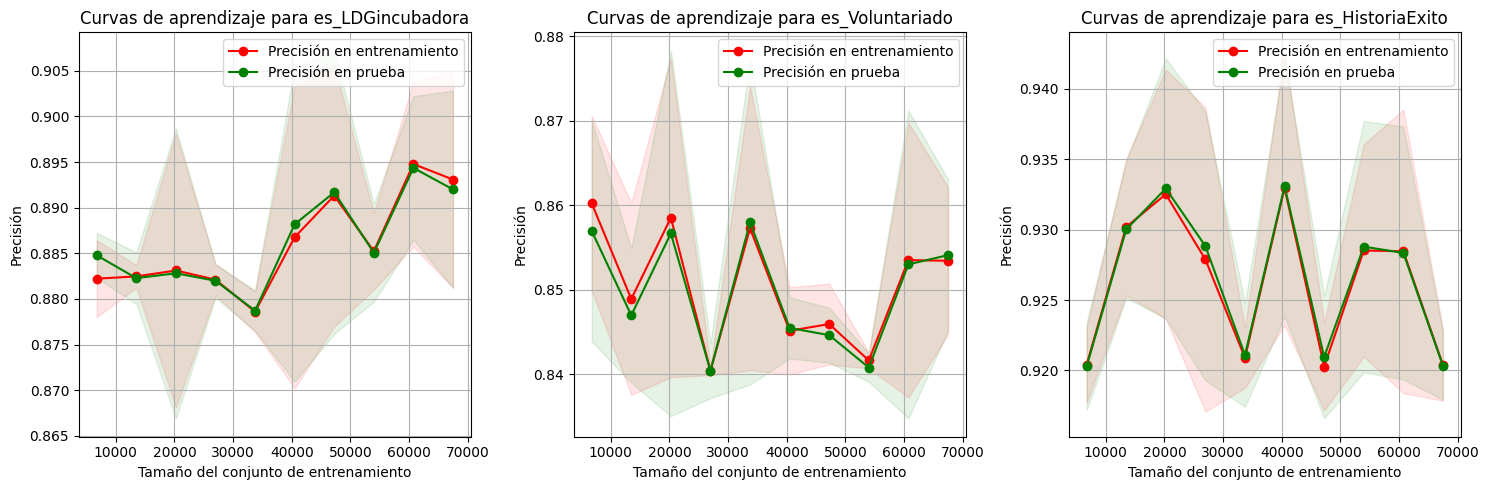

In [59]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Definir las variables objetivo
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(objective_variables), figsize=(15, 5))

# Iterar sobre cada variable objetivo
for i, objective_var in enumerate(objective_variables):
    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=[objective_var])  # la columna objetivo
    y = df_unidoLDG_encoded[objective_var]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Logística
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    # Reducir el tamaño de la muestra al 30%
    X_sample = X.sample(frac=0.3, random_state=42)
    y_sample = y[X_sample.index]

    # Generar las curvas de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_sample, y_sample, cv=3, scoring='accuracy', n_jobs=1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    # Calcular el promedio y desviación estándar de las métricas
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Gráfico de las curvas de aprendizaje en el subplot correspondiente
    axes[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión en entrenamiento")
    axes[i].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisión en prueba")
    axes[i].set_title(f'Curvas de aprendizaje para {objective_var}')
    axes[i].set_xlabel('Tamaño del conjunto de entrenamiento')
    axes[i].set_ylabel('Precisión')
    axes[i].legend(loc="best")
    axes[i].grid()

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Las curvas de aprendizaje muestran que la precisión en el conjunto de entrenamiento y en el de prueba es bastante consistente a medida que aumentamos el tamaño del conjunto de entrenamiento para cada variable objetivo. Esto indica que el modelo de Regresión Logística generaliza bien en todos los casos, sin mostrar signos significativos de subajuste ni sobreajuste. La pequeña brecha entre las curvas de entrenamiento y prueba sugiere que el modelo está bien ajustado y que se beneficia de un tamaño de muestra adecuado para cada variable objetivo.

##Métrica

Elegimos el **accuracy** como la métrica principal para evaluar el desempeño de nuestro modelo, ya que está alineado con los objetivos del problema y proporciona una interpretación clara y significativa en el contexto del negocio.

Aunque nuestras clases estaban originalmente desbalanceadas, en una etapa previa realizamos un balanceo de clases para garantizar que el accuracy fuera representativo del rendimiento del modelo en ambas clases. Esto permite que se refleje de manera justa la capacidad del modelo para clasificar correctamente, sin favorecer a la clase mayoritaria.

Además, el ccuracy es fácil de interpretar para los stakeholders, ya que mide directamente el porcentaje de predicciones correctas. Esta métrica nos permite comparar entre el conjunto de entrenamiento y el de prueba, y también podemos evaluar si el modelo está generalizando bien a nuevos datos.


####Validación cruzada

In [60]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Definir las variables objetivo
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']

# Iterar sobre cada variable objetivo
for i, objective_var in enumerate(objective_variables):
    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=[objective_var])  # la columna objetivo
    y = df_unidoLDG_encoded[objective_var]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Logística
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    # Validación cruzada con 5 particiones (k-fold cross-validation)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)  # Usar todos los núcleos disponibles

    # Mostrar los resultados de validación cruzada
    display(f"Resultados para la variable objetivo: {objective_var}")
    display(f"Scores de validación cruzada: {cv_scores}")
    display(f"Media de la validación cruzada: {cv_scores.mean()}")
    display(f"Desviación estándar de la validación cruzada: {cv_scores.std()}")
    display("-" * 50)

'Resultados para la variable objetivo: es_LDGincubadora'

'Scores de validación cruzada: [0.71577621 0.7354724  0.8674897  0.97178172 0.95496043]'

'Media de la validación cruzada: 0.8490960925731079'

'Desviación estándar de la validación cruzada: 0.1070344625641944'

'--------------------------------------------------'

'Resultados para la variable objetivo: es_Voluntariado'

'Scores de validación cruzada: [0.6372286  0.58463134 0.84414738 0.9133444  0.8844592 ]'

'Media de la validación cruzada: 0.7727621843674655'

'Desviación estándar de la validación cruzada: 0.13497999267663205'

'--------------------------------------------------'

'Resultados para la variable objetivo: es_HistoriaExito'

'Scores de validación cruzada: [0.78046684 0.8499296  0.76416101 0.97470137 0.96026618]'

'Media de la validación cruzada: 0.8659049992695168'

'Desviación estándar de la validación cruzada: 0.08791747610016035'

'--------------------------------------------------'

Inspección de gráficos de residuos

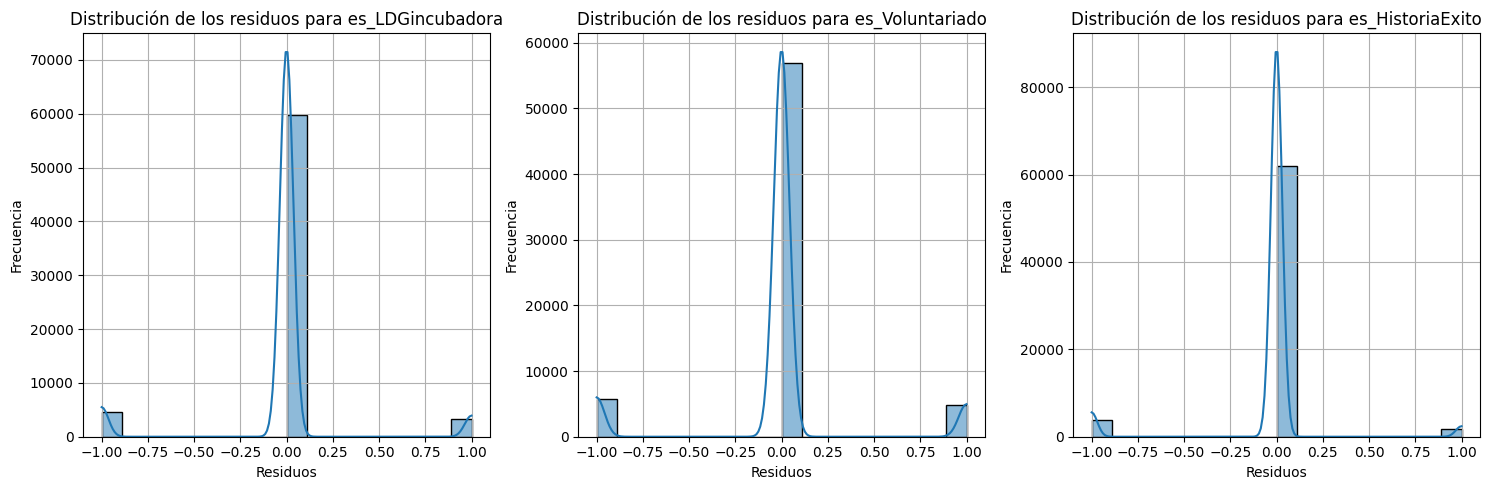

In [61]:
# Crear la figura y los subplots para los histogramas de residuos
fig, axes = plt.subplots(1, len(objective_variables), figsize=(15, 5))

# Iterar sobre cada variable objetivo
for i, objective_var in enumerate(objective_variables):
    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=[objective_var])  # la columna objetivo
    y = df_unidoLDG_encoded[objective_var]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Logística
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular los residuos (diferencia entre predicción y valor real)
    residuos = y_test - y_pred

    # Gráfico de los residuos en el subplot correspondiente
    sns.histplot(residuos, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de los residuos para {objective_var}')
    axes[i].set_xlabel('Residuos')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid()

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

## Desempeño Mínimo Establecido



Utilizamos la validación cruzada como una parte fundamental en la determinación del desempeño mínimo para el modelo baseline, ya que nos permite obtener una estimación robusta y estable del rendimiento del modelo en cada variable objetivo. Al dividir el conjunto de datos en múltiples particiones y calcular el accuracy promedio en cada partición, logramos reducir la dependencia de una sola división de los datos, obteniendo una medida de desempeño que representa mejor la capacidad generalizadora del modelo.

Con base en los resultados de la validación cruzada, podemos establecer los siguientes valores de desempeño mínimo para cada variable objetivo:

### Desempeño Mínimo Establecido para Cada Variable Objetivo

- **es_LDGincubadora**: Desempeño mínimo de **0.849**
- **es_Voluntariado**: Desempeño mínimo de **0.773**
- **es_HistoriaExito**: Desempeño mínimo de **0.866**

Estos valores se basan en el accuracy promedio de validación cruzada para cada variable objetivo y sirven como referencia para evaluar el rendimiento del modelo baseline en el conjunto de prueba.


##Conclusiones generales y respuestas


**RESPUESTA A LAS PREGUNTAS DE REFLEXIÓN**

**¿El modelo está sub/sobreajustando los datos de entrenamiento?**

Para verificar si el modelo está subajustando o sobreajustando los datos, realizamos un análisis comparativo entre las métricas de rendimiento en los conjuntos de entrenamiento y prueba. El accuracy en el conjunto de entrenamiento similar en todos los casos al conjunto de prueba.**Esto indica que el modelo no está sobreajustado ni subajustado en términos de accuracy.**

Además, se realizaron curvas de aprendizaje, que muestran cómo el rendimiento mejora a medida que se aumenta el tamaño del conjunto de entrenamiento. Esto sugiere que el modelo está aprendiendo de manera constante sin sobreajustarse a los datos.

También usamos validación cruzada con k-folds, que proporciona una evaluación más robusta del modelo al entrenarlo y probarlo varias veces. Finalmente, el gráfico de residuos no muestra patrones significativos, lo que indica que los errores se distribuyen de manera aleatoria, lo que es un buen indicativo de que el modelo está bien ajustado.

**¿Cuál es la métrica adecuada para este problema de negocio?**

En este proyecto, utilizamos el **Accuracy** como una métrica principal, dado que el balanceo de clases realizado en una fase anterior permite que el accuracy represente de manera justa el rendimiento del modelo en ambos conjuntos de datos. Esto nos facilita comunicar un resultado claro sobre el porcentaje de predicciones correctas.

Sin embargo, también consideramos el F1-score y el recall como métricas complementarias, especialmente relevantes en el contexto del negocio. El recall es útil para asegurar que capturamos la mayor cantidad posible de casos positivos (iniciativas con respuesta), lo cual es fundamental si el negocio prioriza la correcta identificación de prospectos relevantes. El F1-score, al equilibrar precisión y recall, ayuda a manejar el posible desbalance de errores entre clases, garantizando que no solo detectamos casos positivos, sino que también minimizamos falsos positivos.


**¿Cuál debería ser el desempeño mínimo a obtener?**
Con base en los resultados de la validación cruzada, podemos establecer los siguientes valores de desempeño mínimo para cada variable objetivo:

* Para es_LDGincubadora:Desempeño mínimo: 0.849 (media de la validación cruzada)
Interpretación: Este valor representa el accuracy promedio del modelo en la validación cruzada para es_LDGincubadora. Para que el modelo baseline sea aceptable.

* Para es_Voluntariado: Desempeño mínimo: 0.773 (media de la validación cruzada)
Interpretación: Este valor indica el rendimiento esperado del modelo en el conjunto de prueba para es_Voluntariado. Dado que este es un valor más bajo en comparación con las otras variables objetivo, es importante que el modelo supere este umbral.

* Para es_HistoriaExito:Desempeño mínimo: 0.866 (media de la validación cruzada)
Interpretación: Este valor es el accuracy promedio en validación cruzada para es_HistoriaExito. Si el modelo baseline logra o supera este valor en el conjunto de prueba, podemos considerarlo un rendimiento aceptable para esta variable objetivo.